# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q1**: Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the average treatment effect.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("heart_hw.csv")
print(df.head())

   Unnamed: 0  age transplant  y
0           1   53    control  0
1           2   43    control  0
2           3   52    control  0
3           4   52    control  0
4           5   54    control  0


In [3]:
#a) proportion of people who survive in control group who do not receive a transplant
#get the whole control group
control_group = df[df["transplant"] == "control"]
#find number of survivers in the control group
control_survivors = control_group["y"].sum()
#find total number of control people
control_total = len(control_group)
#find proprotion of people who survived out of control group
control_survival_proportion = control_survivors / control_total
print("Proportion of people who survived in the control group who did not receive a transplant:", control_survival_proportion)

#b) difference between the proportion of people who survive in the treatment group and proportion of people who survive in the control group#g
#get the whole treatment group
treatment_group = df[df["transplant"] == "treatment"]
#find number of survivors in the treatment group
treatment_survivors = treatment_group["y"].sum()
#find total number of treatment people
treatment_total = len(treatment_group)
#find proportion of people who survive in treatment vs control
treatment_survival_proportion = treatment_survivors / treatment_total
#difference between treatment survival and control survival
average_treatment_effect = treatment_survival_proportion - control_survival_proportion
print("Difference in survival proportion (Average Treatment Effect):", average_treatment_effect)

Proportion of people who survived in the control group who did not receive a transplant: 0.11764705882352941
Difference in survival proportion (Average Treatment Effect): 0.23017902813299232


**Q2**:Regress y on transplant using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

The regression results match exactly with the manual calculations in part 1. The intercept equals the control group’s survival proportion, and the transplant coefficient equals the difference in survival between treatment and control. This shows that regressing survival on a binary treatment indicator is algebraically equivalent to computing the difference in mean survival between groups.

In [4]:
from sklearn.linear_model import LinearRegression

#create binary variable for treatment and control
df["transplant_binary"] = (df["transplant"] == "treatment").astype(int)

#set up x and y
X = df[["transplant_binary"]]   # predictor (needs to be a 2D array)
y = df["y"]                     # outcome

#fit linear regression
model = LinearRegression()
model.fit(X, y)

#coefficients
intercept = model.intercept_
coefficient = model.coef_[0]
print(intercept)
print(coefficient)


0.1176470588235293
0.23017902813299249


**Q3**: We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress y on a constant, transplant, and age. How does the intercept change?

The intercept increases from 0.117 to 0.701.


In [5]:
df["transplant_binary"] = (df["transplant"] == "treatment").astype(int)

# predictors (constant automatically added by sklearn)
X = df[["transplant_binary", "age"]]
y = df["y"]

# fit regression
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_transplant = model.coef_[0]
coef_age = model.coef_[1]

print("Intercept:", intercept)
print("Coefficient on transplant:", coef_transplant)
print("Coefficient on age:", coef_age)

Intercept: 0.7019569721740947
Coefficient on transplant: 0.2647016865036751
Coefficient on age: -0.013607217160218647


**Q4**: Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.


After allowing for non-linear age effects and an interaction between age and transplant status, the model fit improved slightly (R² train = 0.16, R² test = 0.23). The plot shows that predicted survival probabilities decrease with age for both groups, but there is a much more steep and dramatic decline for transplant recipients. Younger patients seem to benefit more from a transplant, with predicted survival above 0.8, while older patients have smaller or even negative benefits as surgical risks increase. The curve in both lines comes from the squared age term, and the shrinking gap between groups reflects the negative interaction between age and transplant. Overall, the model suggests that transplants help younger patients the most and are less effective for older ones.


Train R^2: 0.15618479650026795
Test R^2: 0.23291360740207956
Intercept: 0.08120500467749936
Coefficients: [ 7.38723001e-01  1.24760093e-02 -2.45413408e-04 -1.21592215e-02]


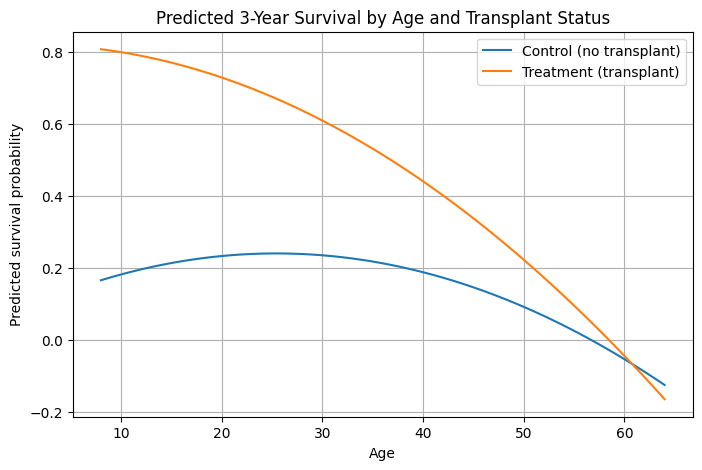

In [8]:
from sklearn.model_selection import train_test_split
#create binary variable for treatment and control
df["transplant_binary"] = (df["transplant"] == "treatment").astype(int)

#create non linear age which is age^2
df["age2"] = df["age"] ** 2

#create a variable because transplant helpfulness could depend on age
df["transplant_age"] = df["transplant_binary"] * df["age"]

#define predictors
X = df[["transplant_binary", "age", "age2", "transplant_age"]]
y = df["y"]

#create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting model
model = LinearRegression()
model.fit(X_train, y_train)

#evaluate R^2 on train/test
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
#test R^2 is slightly higher than train R^2, so model is not overfitting, which means it can generalize well. moderatelly fits the data.

#predict survival probabilities over age range for both groups
age_range = np.linspace(df["age"].min(), df["age"].max(), 100)
pred_df = pd.DataFrame({
    "age": age_range,
    "age2": age_range**2,
    "transplant_binary": [0]*100,
    "transplant_age": [0]*100
})
pred_df_treat = pred_df.copy()
pred_df_treat["transplant_binary"] = 1
pred_df_treat["transplant_age"] = age_range

#predictions
pred_df["pred"] = model.predict(pred_df[["transplant_binary", "age", "age2", "transplant_age"]])
pred_df_treat["pred"] = model.predict(pred_df_treat[["transplant_binary", "age", "age2", "transplant_age"]])

#plot
plt.figure(figsize=(8,5))
plt.plot(pred_df["age"], pred_df["pred"], label="Control (no transplant)")
plt.plot(pred_df_treat["age"], pred_df_treat["pred"], label="Treatment (transplant)")
plt.xlabel("Age")
plt.ylabel("Predicted survival probability")
plt.title("Predicted 3-Year Survival by Age and Transplant Status")
plt.legend()
plt.grid(True)
plt.show()


**Q5**: Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?



I think these models can be useful, but they shouldn’t be the only thing used to make decisions. They can create bias, especially since they might make it look like transplants are less successful for older people when that’s not always true. The model doesn’t consider all the other factors that affect survival, and it really oversimplifies a complex decision. Ethically, it also feels strange that data like this could be used to decide who gets an organ. It takes away the human and emotional side of the decision, almost like a machine is judging whose life is more worth saving. I think models like this should be used carefully and with a grain of salt; hey can help guide decisions, they shouldn't be the only tool determining who gets an organ.
